In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/thiagoamaciel/data-eng/master/major-contract-awards18.csv")

In [0]:
df.head()

,As of Date,Fiscal Year,Region,Borrower Country,Borrower Country Code,Project ID,Project Name,Procurement Type,Procurement Category,Procurement Method,Product line,Major Sector,WB Contract Number,Contract Description,Contract Signing Date,Supplier,Supplier Country,Supplier Country Code,Total Contract Amount (USD),Borrower Contract Reference Number,Main Loan or Credit
0,2019-08-07T00:00:00.000,2000,AFR,Angola,AO,P000044,FINANCIAL INSTITUTIO,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Financial Sector,1207736,OIL SECTOR STUDY - CONTRCT WITH KPMG,2000-11-20T00:00:00.000,KPMG INTERNATIONAL,United Kingdom,GB,-1600000.00,KPMG - 11/20/2000,NaN
1,2019-08-07T00:00:00.000,2000,AFR,Angola,AO,P000044,FINANCIAL INSTITUTIO,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Public Admin,1207736,OIL SECTOR STUDY - CONTRCT WITH KPMG,2000-11-20T00:00:00.000,KPMG INTERNATIONAL,United Kingdom,GB,3200000.00,KPMG - 11/20/2000,NaN
2,2019-08-07T00:00:00.000,2000,AFR,Burkina Faso,BF,P000306,BF-Ouaga Water Suply (FY01),Preinvestment Activity,CONSULTANT SERVICES,Single Source Selection,IBRD/IDA,Water/Sanit/Waste,1117305,CONSULTANT SERVICES FOR CONTRACTS PREPARATION,1999-06-28T00:00:00.000,ICEA,France,FR,162643.21,18/ONEA/99,NaN
3,2019-08-07T00:00:00.000,2000,AFR,Burkina Faso,BF,P000276,TRANSPORT SECAL,"Equipment, Telecommunications",GOODS,International Competitive Bidding,IBRD/IDA,Public Admin,1119184,SUPPLY & INSTALLATION OF OPTIC CABLE BTWN ABID...,1999-08-31T00:00:00.000,CABLES PIRELLI S.A.,France,FR,4124340.34,139/SIT/IF/STS/BF/99,NaN
4,2019-08-07T00:00:00.000,2000,AFR,Burkina Faso,BF,P000276,TRANSPORT SECAL,"Equipment, Telecommunications",GOODS,International Competitive Bidding,IBRD/IDA,Transportation,1119184,SUPPLY & INSTALLATION OF OPTIC CABLE BTWN ABID...,1999-08-31T00:00:00.000,CABLES PIRELLI S.A.,France,FR,0.00,139/SIT/IF/STS/BF/99,NaN


In [0]:
df3['Borrower Country'] = df3['Borrower Country'].astype('category')

In [0]:
df3[df3['log_contract'] > 6].groupby('Borrower Country').sum().sort_values('log_contract',ascending=False)

,Fiscal Year,WB Contract Number,Total Contract Amount (USD),Main Loan or Credit,log_contract
Borrower Country,,,,,
China,136000,76949179,4.994483e+08,0.0,455.472932
India,74000,43682304,1.072900e+08,0.0,235.169761
Poland,26000,14723613,1.241839e+08,0.0,87.770550
Argentina,26000,15007416,4.322362e+07,0.0,84.183688
Croatia,18000,10062708,1.474997e+07,0.0,55.651032
...,...,...,...,...,...
Lithuania,0,0,0.000000e+00,0.0,0.000000
Malaysia,0,0,0.000000e+00,0.0,0.000000
Mauritania,0,0,0.000000e+00,0.0,0.000000


In [0]:
df.dtypes

As of Date                             object
Fiscal Year                             int64
Region                                 object
Borrower Country                       object
Borrower Country Code                  object
Project ID                             object
Project Name                           object
Procurement Type                       object
Procurement Category                   object
Procurement Method                     object
Product line                           object
Major Sector                           object
WB Contract Number                      int64
Contract Description                   object
Contract Signing Date                  object
Supplier                               object
Supplier Country                       object
Supplier Country Code                  object
Total Contract Amount (USD)           float64
Borrower Contract Reference Number     object
Main Loan or Credit                   float64
log_contract                      

In [0]:
df.dtypes

As of Date                             object
Fiscal Year                             int64
Region                                 object
Borrower Country                       object
Borrower Country Code                  object
Project ID                             object
Project Name                           object
Procurement Type                       object
Procurement Category                   object
Procurement Method                     object
Product line                           object
Major Sector                           object
WB Contract Number                      int64
Contract Description                   object
Contract Signing Date                  object
Supplier                               object
Supplier Country                       object
Supplier Country Code                  object
Total Contract Amount (USD)           float64
Borrower Contract Reference Number     object
Main Loan or Credit                   float64
dtype: object

In [0]:
sum(df['Total Contract Amount (USD)'] < 0)

369

In [0]:
df3 = df.drop(df.index[df['Total Contract Amount (USD)'] < 0])

In [0]:
df3.head()

,As of Date,Fiscal Year,Region,Borrower Country,Borrower Country Code,Project ID,Project Name,Procurement Type,Procurement Category,Procurement Method,Product line,Major Sector,WB Contract Number,Contract Description,Contract Signing Date,Supplier,Supplier Country,Supplier Country Code,Total Contract Amount (USD),Borrower Contract Reference Number,Main Loan or Credit
1,2019-08-07T00:00:00.000,2000,AFR,Angola,AO,P000044,FINANCIAL INSTITUTIO,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Public Admin,1207736,OIL SECTOR STUDY - CONTRCT WITH KPMG,2000-11-20T00:00:00.000,KPMG INTERNATIONAL,United Kingdom,GB,3200000.00,KPMG - 11/20/2000,NaN
2,2019-08-07T00:00:00.000,2000,AFR,Burkina Faso,BF,P000306,BF-Ouaga Water Suply (FY01),Preinvestment Activity,CONSULTANT SERVICES,Single Source Selection,IBRD/IDA,Water/Sanit/Waste,1117305,CONSULTANT SERVICES FOR CONTRACTS PREPARATION,1999-06-28T00:00:00.000,ICEA,France,FR,162643.21,18/ONEA/99,NaN
3,2019-08-07T00:00:00.000,2000,AFR,Burkina Faso,BF,P000276,TRANSPORT SECAL,"Equipment, Telecommunications",GOODS,International Competitive Bidding,IBRD/IDA,Public Admin,1119184,SUPPLY & INSTALLATION OF OPTIC CABLE BTWN ABID...,1999-08-31T00:00:00.000,CABLES PIRELLI S.A.,France,FR,4124340.34,139/SIT/IF/STS/BF/99,NaN
4,2019-08-07T00:00:00.000,2000,AFR,Burkina Faso,BF,P000276,TRANSPORT SECAL,"Equipment, Telecommunications",GOODS,International Competitive Bidding,IBRD/IDA,Transportation,1119184,SUPPLY & INSTALLATION OF OPTIC CABLE BTWN ABID...,1999-08-31T00:00:00.000,CABLES PIRELLI S.A.,France,FR,0.00,139/SIT/IF/STS/BF/99,NaN
5,2019-08-07T00:00:00.000,2000,AFR,Madagascar,MG,P052186,MG-Microfinance,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Financial Sector,1116602,APPUI AU DEVELOPPEMENT DU RESEAU OTIV (TOAMASINA),1999-09-17T00:00:00.000,DEVELOPMENT INTERNA.DESJARDINS,Canada,CA,0.00,1/01/10/99/AGEPMF/DID,NaN


In [0]:
df3.groupby(df['Region'])['Total Contract Amount (USD)'].mean()

Region
AFR    6.425640e+05
EAP    2.180094e+06
ECA    8.543316e+05
LCR    8.216438e+05
MNA    3.825583e+05
SAR    8.436214e+05
Name: Total Contract Amount (USD), dtype: float64

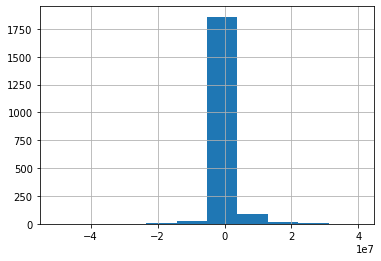

In [0]:
df['Total Contract Amount (USD)'].hist()

In [0]:
df3['log_contract'] = df3['Total Contract Amount (USD)'].apply(np.log10)

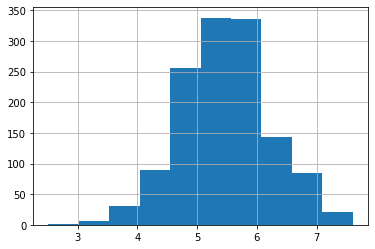

In [0]:
df3[df3['log_contract'] > 0]['log_contract'].hist()

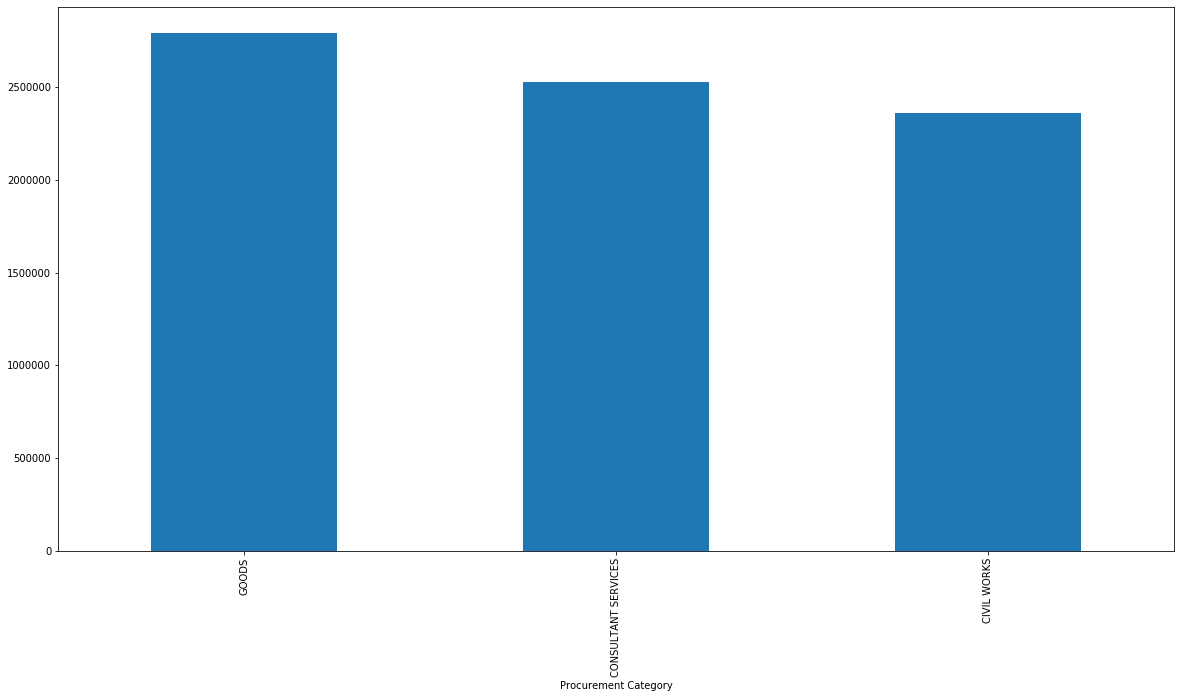

In [0]:
df3[df3['log_contract'] > 6].groupby('Procurement Category')['Total Contract Amount (USD)'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

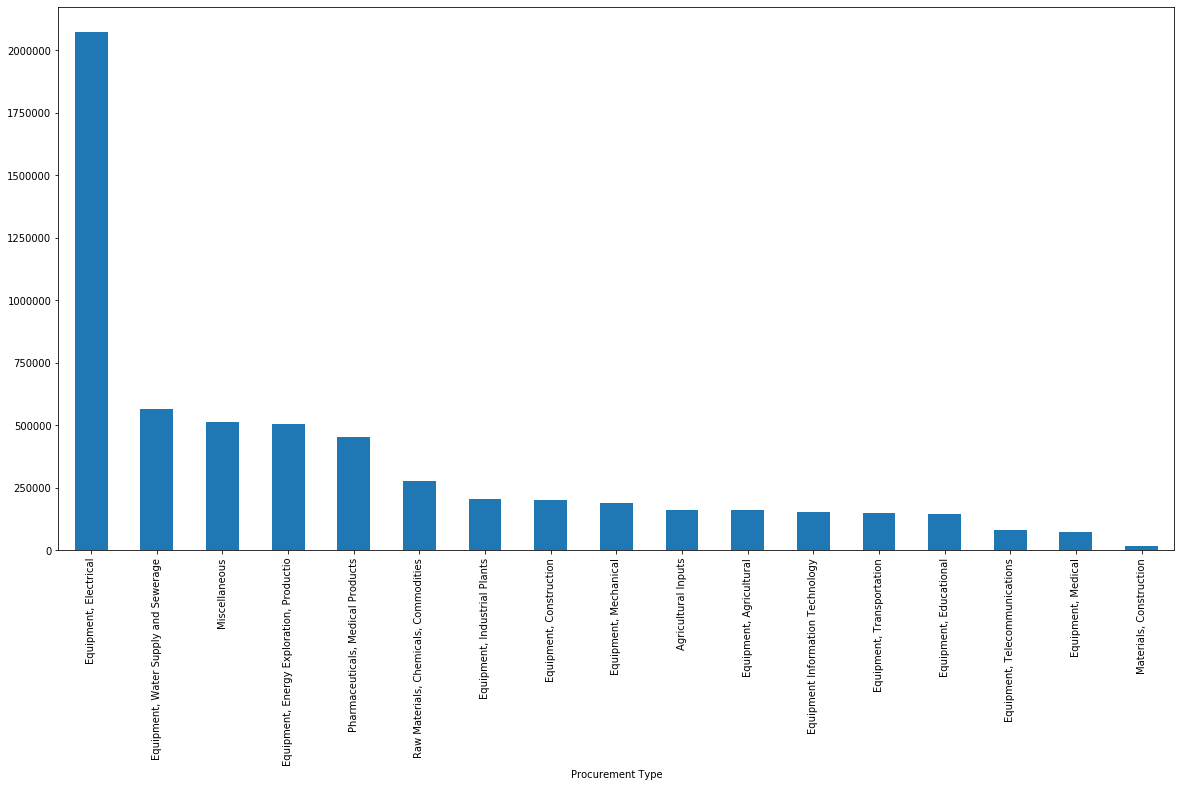

In [0]:
df3[(df3['Procurement Category'] == 'GOODS')].groupby('Procurement Type')['Total Contract Amount (USD)'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

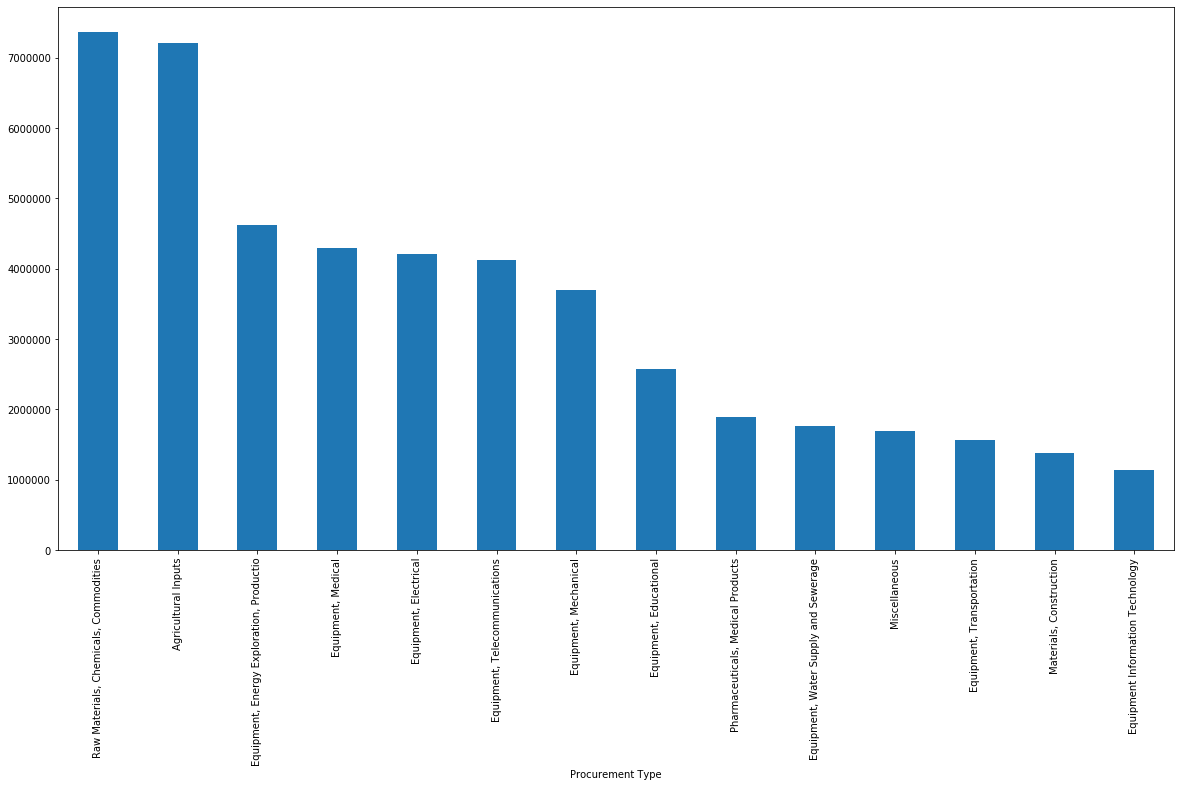

In [0]:
df3[(df3['Procurement Category'] == 'GOODS') & (df3['log_contract'] > 6) ].groupby('Procurement Type')['Total Contract Amount (USD)'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [0]:
df2.head()

,As of Date,Fiscal Year,Region,Borrower Country,Borrower Country Code,Project ID,Project Name,Procurement Type,Procurement Category,Procurement Method,Product line,Major Sector,WB Contract Number,Contract Description,Contract Signing Date,Supplier,Supplier Country,Supplier Country Code,Total Contract Amount (USD),Borrower Contract Reference Number,Main Loan or Credit
1,2019-08-07T00:00:00.000,2000,AFR,Angola,AO,P000044,FINANCIAL INSTITUTIO,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Public Admin,1207736,OIL SECTOR STUDY - CONTRCT WITH KPMG,2000-11-20T00:00:00.000,KPMG INTERNATIONAL,United Kingdom,GB,3200000.00,KPMG - 11/20/2000,NaN
2,2019-08-07T00:00:00.000,2000,AFR,Burkina Faso,BF,P000306,BF-Ouaga Water Suply (FY01),Preinvestment Activity,CONSULTANT SERVICES,Single Source Selection,IBRD/IDA,Water/Sanit/Waste,1117305,CONSULTANT SERVICES FOR CONTRACTS PREPARATION,1999-06-28T00:00:00.000,ICEA,France,FR,162643.21,18/ONEA/99,NaN
3,2019-08-07T00:00:00.000,2000,AFR,Burkina Faso,BF,P000276,TRANSPORT SECAL,"Equipment, Telecommunications",GOODS,International Competitive Bidding,IBRD/IDA,Public Admin,1119184,SUPPLY & INSTALLATION OF OPTIC CABLE BTWN ABID...,1999-08-31T00:00:00.000,CABLES PIRELLI S.A.,France,FR,4124340.34,139/SIT/IF/STS/BF/99,NaN
4,2019-08-07T00:00:00.000,2000,AFR,Burkina Faso,BF,P000276,TRANSPORT SECAL,"Equipment, Telecommunications",GOODS,International Competitive Bidding,IBRD/IDA,Transportation,1119184,SUPPLY & INSTALLATION OF OPTIC CABLE BTWN ABID...,1999-08-31T00:00:00.000,CABLES PIRELLI S.A.,France,FR,0.00,139/SIT/IF/STS/BF/99,NaN
5,2019-08-07T00:00:00.000,2000,AFR,Madagascar,MG,P052186,MG-Microfinance,Implementation Activity,CONSULTANT SERVICES,Quality And Cost-Based Selection,IBRD/IDA,Financial Sector,1116602,APPUI AU DEVELOPPEMENT DU RESEAU OTIV (TOAMASINA),1999-09-17T00:00:00.000,DEVELOPMENT INTERNA.DESJARDINS,Canada,CA,0.00,1/01/10/99/AGEPMF/DID,NaN


In [0]:
df = df.rename(columns={'Area (sq. mi.)' : 'Area','Pop. Density (per sq. mi.)' : 'Pop. Density','Coastline (coast/area ratio)' : 'Coastline', 'Infant mortality (per 1000 births)' : 'Infant mortality','GDP ($ per capita)' : 'GDP','Phones (per 1000)' : 'Phones'})

In [0]:
df['Country'] = df['Country'].astype('category')
df['Region'] = df['Region'].astype('category')

In [0]:
df.dtypes

Country             category
Region              category
Population             int64
Area                   int64
Pop. Density         float64
Coastline            float64
Net migration        float64
Infant mortality     float64
GDP                  float64
Literacy (%)         float64
Phones               float64
Arable (%)           float64
Crops (%)            float64
Other (%)            float64
Climate              float64
Birthrate            float64
Deathrate            float64
Agriculture          float64
Industry             float64
Service              float64
dtype: object

In [0]:
df.corr(method='pearson')

,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy (%),Phones,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.023003,-0.039324,-0.043481,-0.030819,0.188251,-0.060757,-0.120606,-0.026546,-0.045090,-0.028367,0.000376,0.099333,-0.080852
Area,0.469985,1.000000,-0.066917,-0.095627,0.047470,-0.007163,0.072185,0.035994,0.053403,-0.079714,-0.143916,0.138974,-0.117134,-0.066423,0.040079,-0.050640,0.121565,-0.054369
Pop. Density,-0.028190,-0.066917,1.000000,0.241690,0.178038,-0.144238,0.195773,0.097230,0.280172,-0.081015,-0.031661,0.081859,0.009064,-0.159192,-0.070045,-0.107142,-0.139803,0.248774
Coastline,-0.068199,-0.095627,0.241690,1.000000,-0.134145,-0.136577,0.049118,0.117095,0.152129,-0.120772,0.341820,-0.079494,-0.032579,-0.075765,-0.161866,-0.030250,-0.199995,0.196528
Net migration,0.000011,0.047470,0.178038,-0.134145,1.000000,-0.025015,0.382461,-0.008761,0.239601,-0.058170,-0.347968,0.225299,-0.015170,-0.066537,0.033611,-0.116719,-0.026324,0.127134
Infant mortality,0.023003,-0.007163,-0.144238,-0.136577,-0.025015,1.000000,-0.600774,-0.765536,-0.672312,-0.113859,-0.062366,0.124100,-0.374406,0.845764,0.656338,0.709475,0.003322,-0.633982
GDP,-0.039324,0.072185,0.195773,0.049118,0.382461,-0.600774,1.000000,0.513144,0.834499,0.019768,-0.219229,0.097828,0.340791,-0.650137,-0.201661,-0.586769,-0.028926,0.550216
Literacy (%),-0.043481,0.035994,0.097230,0.117095,-0.008761,-0.765536,0.513144,1.000000,0.601935,0.105021,0.042825,-0.107563,0.392081,-0.790846,-0.393946,-0.609638,0.064733,0.494607
Phones,-0.030819,0.053403,0.280172,0.152129,0.239601,-0.672312,0.834499,0.601935,1.000000,0.061022,-0.152420,0.029900,0.402161,-0.724614,-0.260309,-0.601739,-0.152452,0.683934
Arable (%),0.188251,-0.079714,-0.081015,-0.120772,-0.058170,-0.113859,0.019768,0.105021,0.061022,1.000000,0.094361,-0.856763,0.380031,-0.186823,0.053472,-0.034822,-0.063618,0.091126


In [0]:
df[df['Region'].str.contains('AMERICA')].corr(method='pearson')

,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy (%),Phones,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.666692,-0.269315,-0.374167,0.412914,-0.343286,0.541166,-0.598899,0.586499,0.455198,0.999799,-0.463820,0.866039,0.197386,0.629288,-0.409996,0.142304,-0.100976
Area,0.666692,1.000000,-0.482691,-0.624236,0.654834,-0.506871,0.527329,-0.904235,0.045542,-0.085162,0.652026,0.077588,0.738729,-0.193565,0.643155,0.526756,0.900109,-0.881192
Pop. Density,-0.269315,-0.482691,1.000000,0.971235,0.258525,-0.024851,0.431623,0.183057,0.501459,0.566975,-0.263261,-0.561197,0.021902,-0.467069,0.043395,-0.516876,-0.895002,0.875658
Coastline,-0.374167,-0.624236,0.971235,1.000000,0.151528,-0.046826,0.226786,0.414644,0.486632,0.583870,-0.366622,-0.576875,-0.008202,-0.459873,-0.189762,-0.492958,-0.882300,0.861941
Net migration,0.412914,0.654834,0.258525,0.151528,1.000000,-0.829495,0.745549,-0.935472,0.504208,0.455940,0.399950,-0.457991,0.898993,-0.792344,0.444805,0.966707,0.953403,-0.965136
Infant mortality,-0.343286,-0.506871,-0.024851,-0.046826,-0.829495,1.000000,-0.290164,0.672394,-0.506665,-0.509390,-0.331976,0.510423,-0.950798,0.753255,0.041412,-0.843871,-0.999999,0.999087
GDP,0.541166,0.527329,0.431623,0.226786,0.745549,-0.290164,1.000000,-0.808924,0.523324,0.422878,0.536099,-0.426588,0.908289,-0.360183,0.862894,-0.976735,-0.709952,0.738654
Literacy (%),-0.598899,-0.904235,0.183057,0.414644,-0.935472,0.672394,-0.808924,1.000000,-0.045583,0.162079,-0.585230,-0.152113,-1.000000,0.227534,-0.914630,-0.500000,-0.886089,0.866025
Phones,0.586499,0.045542,0.501459,0.486632,0.504208,-0.506665,0.523324,-0.045583,1.000000,0.986203,0.592643,-0.987656,0.909340,-0.263846,0.202237,-0.992261,-0.771418,0.797239
Arable (%),0.455198,-0.085162,0.566975,0.583870,0.455940,-0.509390,0.422878,0.162079,0.986203,1.000000,0.462141,-0.999953,0.846143,-0.316143,0.054674,-0.998672,-0.870934,0.890635


In [0]:
df.shape

(1744, 13)

In [0]:
print(df.isnull().sum())

price        0.000000
latitude     0.000000
longitude    0.000000
bedrooms     0.004030
area         0.013364
pkspaces     0.059538
bathrooms    0.133940
ensuites     1.282723
suburb       0.000000
district     0.000000
city         0.000000
state        0.000000
type         0.000000
dtype: float64


In [0]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [0]:
df['Region'] = df['Region'].astype(np.str)
df['Country'] = df['Country'].astype(np.str)

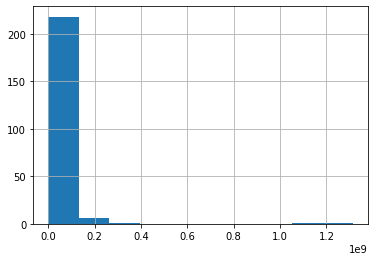

In [0]:
df['Population'].hist()

In [0]:
df['Population'].

0      31056997
1       3581655
2      32930091
3         57794
4         71201
         ...   
222     2460492
223      273008
224    21456188
225    11502010
226    12236805
Name: Population, Length: 227, dtype: int64

In [0]:
df['Log_Population'] = df['Population'].apply(np.log10)

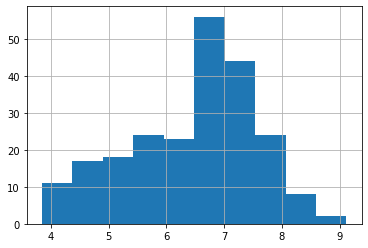

In [0]:
df[df['Log_Population'] > 0]['Log_Population'].hist()

,mean,median
Region,,
ASIA (EX. NEAR EAST),0.302143,0.2815
BALTICS,0.293333,0.2940
C.W. OF IND. STATES,0.328000,0.3295
EASTERN EUROPE,0.309250,0.3095
LATIN AMER. & CARIB,0.256116,0.2590
NEAR EAST,0.406000,0.3520
NORTHERN AFRICA,0.426200,0.3570
NORTHERN AMERICA,0.199333,0.2040
OCEANIA,0.215250,0.1710


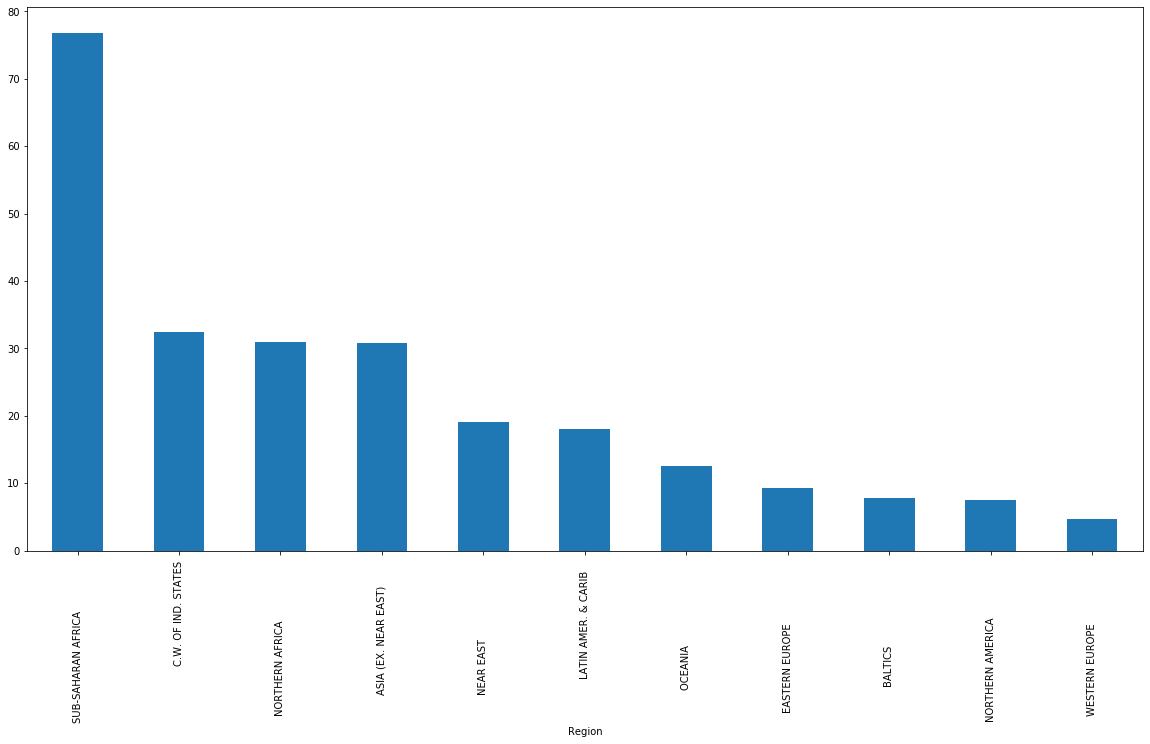

In [0]:
df.groupby(['Region'])['Infant mortality'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))
df.groupby(['Region']).agg(['mean','median'])['Industry']

In [0]:
print(df.isnull().sum())

Country              0
Region               0
Population           0
Area                 0
Pop. Density         0
Coastline            0
Net migration        3
Infant mortality     3
GDP                  1
Literacy (%)        18
Phones               4
Arable (%)           2
Crops (%)            2
Other (%)            2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64


In [0]:
df.shape

(227, 20)

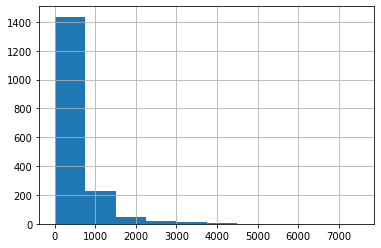

In [0]:
(df['price']/1000).hist()

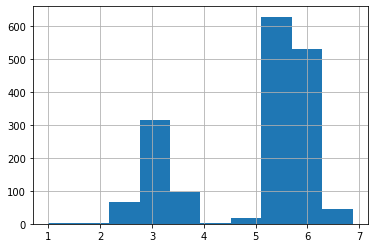

In [0]:
df['log_price'] = df['price'].apply(np.log10)
df[df['log_price'] > 0]['log_price'].hist()


In [0]:
df['operation'] = 'sell'
df.loc[(df['price'] > 1000) & (df['price'] < 30000),'operation'] = 'rent'
df = df.drop(['log_price'],axis=1)
df.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,rent
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,sell
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,sell
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,sell
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,sell


In [0]:
df.dtypes

price          int64
latitude     float64
longitude    float64
bedrooms     float64
area         float64
pkspaces     float64
bathrooms    float64
ensuites     float64
suburb        object
district      object
city          object
state         object
type          object
operation     object
dtype: object

In [0]:
df.describe()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites
count,1.744000e+03,1744.000000,1744.000000,1737.000000,1721.000000,1646.000000,1538.000000,764.000000
mean,4.650508e+05,-8.059572,-34.903232,2.998273,120.782493,1.788578,2.676853,1.429319
std,5.927109e+05,0.036093,0.015105,1.057940,95.680958,1.030367,1.281568,0.872759
min,0.000000e+00,-8.159529,-34.971088,1.000000,25.000000,0.000000,0.000000,1.000000
25%,2.300000e+03,-8.064218,-34.910381,2.000000,70.000000,1.000000,2.000000,1.000000
50%,3.500000e+05,-8.045020,-34.902294,3.000000,94.000000,2.000000,3.000000,1.000000
75%,6.300000e+05,-8.033553,-34.894247,4.000000,139.000000,2.000000,3.000000,2.000000
max,7.500000e+06,-7.969322,-34.874427,15.000000,1682.000000,15.000000,8.000000,6.000000


In [0]:
df['price'].mean()

465050.814793578

In [0]:
df['price'].mode()

351306173214.81964

In [0]:
df['price'].var()

351306173214.81964

In [0]:
df['area'].describe()

count    1721.000000
mean      120.782493
std        95.680958
min        25.000000
25%        70.000000
50%        94.000000
75%       139.000000
max      1682.000000
Name: area, dtype: float64

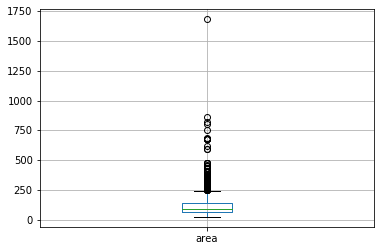

In [0]:
df.boxplot(column=['area'])

In [0]:
df['price_square_meter'] = df['price']/df['area']
df.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation,price_square_meter
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,rent,40.540541
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,sell,3837.209302
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,sell,3109.756098
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,sell,4000.000000
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,sell,3092.783505


In [0]:
df[(df.type == 'apart') & (df.bedrooms <= 3) & (df.suburb == 'Espinheiro')].price_square_meter.mean()

4033.597020052011

In [0]:
df[df['operation'] == 'sell'].groupby(['suburb'])['price_square_meter'].mean()

suburb
Aflitos              4622.471139
Apipucos             4953.378876
Areias               2317.073171
Arruda               3046.635647
Boa Viagem           4193.372830
Boa Vista            1753.634041
Campo Grande         4304.823422
Casa Amarela         4719.350205
Casa Forte           5996.203587
CaxangÌÁ             4587.357285
Coelhos              4666.666667
Cohab                1933.333333
Cordeiro             3836.858126
Curado                 15.000000
Derby                6030.821837
Dois IrmÌ£os            3.986667
Encruzilhada         4675.743482
Engenho do Meio      5790.620197
Espinheiro           4937.518925
EstÌ¢ncia              12.765957
FundÌ£o              3920.280333
GraÌ¤as              3606.651722
HipÌ_dromo           2502.343750
Ibura                5990.463333
Ilha do Retiro       5590.478563
Imbiribeira          7429.313717
Ipsep                2777.982481
Iputinga              824.675426
Jaqueira             6517.830213
Jardim SÌ£o Paulo       6.002158
Mad

In [0]:
df[df['operation'] == 'sell'].groupby(['suburb']).agg(['mean','median'])['price_square_meter']

,mean,median
suburb,,
Aflitos,4622.471139,4738.095238
Apipucos,4953.378876,4317.180617
Areias,2317.073171,2317.073171
Arruda,3046.635647,1950.000000
Boa Viagem,4193.372830,4166.666667
Boa Vista,1753.634041,11.196911
Campo Grande,4304.823422,4130.434783
Casa Amarela,4719.350205,5466.666667
Casa Forte,5996.203587,6181.818182


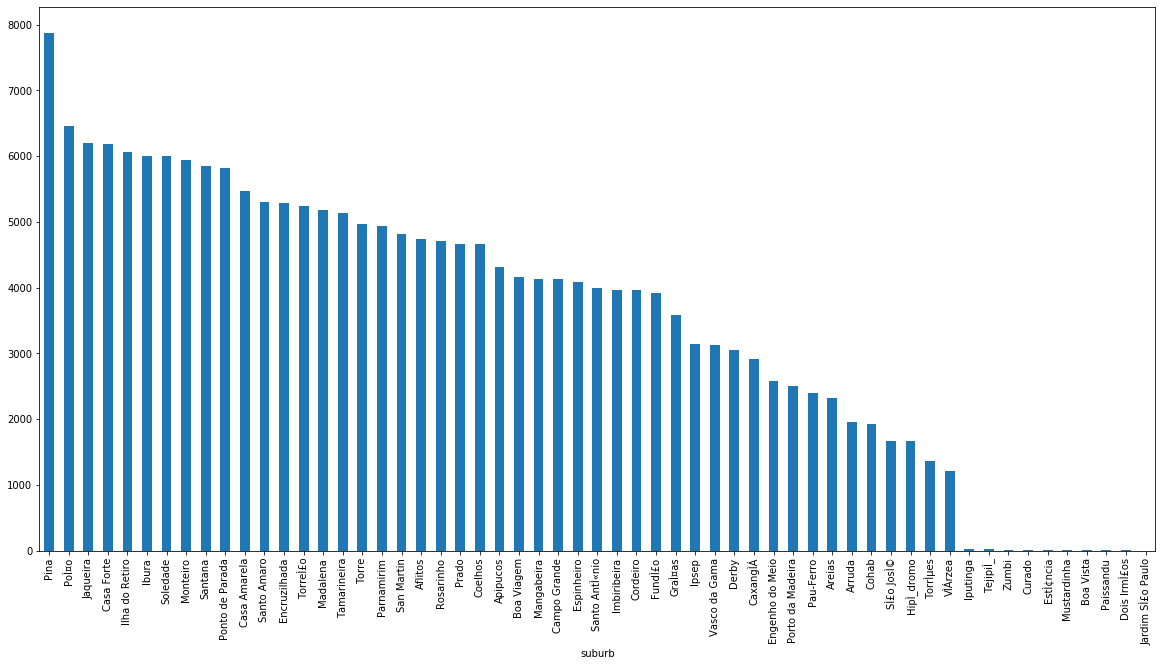

In [0]:
df[df['operation'] == 'sell'].groupby(['suburb'])['price_square_meter'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [0]:
df[(df['suburb'] == 'Soledade') & (df['operation'] == 'sell')]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation,price_square_meter
179,365000,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,sell,7156.862745
182,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,6000.000000
231,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,5391.304348
400,2858000,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,sell,56039.215686
476,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,5391.304348
618,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,6000.000000
628,592139,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,sell,11610.568627
752,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,6000.000000
788,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,5391.304348
862,261125,-8.055979,-34.895347,4.0,134.00,3.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,1948.694030


In [0]:
df[(df['suburb'] == 'Pina') & (df['operation'] == 'sell')]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation,price_square_meter
84,950000,-8.094108,-34.885570,4.0,161.0,3.0,6.0,4.0,Pina,Recife,Recife,Pernambuco,apart,sell,5900.621118
166,315000,-8.094108,-34.885570,1.0,40.0,1.0,1.0,NaN,Pina,Recife,Recife,Pernambuco,apart,sell,7875.000000
301,1200000,-8.094108,-34.885570,4.0,136.0,2.0,4.0,2.0,Pina,Recife,Recife,Pernambuco,apart,sell,8823.529412
354,1200000,-8.094108,-34.885570,4.0,136.0,2.0,4.0,2.0,Pina,Recife,Recife,Pernambuco,apart,sell,8823.529412
521,315000,-8.094108,-34.885570,1.0,40.0,1.0,1.0,NaN,Pina,Recife,Recife,Pernambuco,apart,sell,7875.000000
522,950000,-8.094108,-34.885570,4.0,161.0,3.0,6.0,4.0,Pina,Recife,Recife,Pernambuco,apart,sell,5900.621118
540,950000,-8.094108,-34.885570,4.0,161.0,3.0,6.0,4.0,Pina,Recife,Recife,Pernambuco,apart,sell,5900.621118
581,315000,-8.094108,-34.885570,1.0,40.0,1.0,1.0,NaN,Pina,Recife,Recife,Pernambuco,apart,sell,7875.000000
636,1200000,-8.094108,-34.885570,4.0,136.0,2.0,4.0,2.0,Pina,Recife,Recife,Pernambuco,apart,sell,8823.529412
888,315000,-8.094108,-34.885570,1.0,40.0,1.0,1.0,NaN,Pina,Recife,Recife,Pernambuco,apart,sell,7875.000000


In [0]:
df[df.operation == 'sell'].corr(method='pearson')

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,price_square_meter
price,1.000000,-0.017435,-0.007448,0.466321,0.654858,0.509652,0.551941,0.676180,0.593587
latitude,-0.017435,1.000000,-0.075736,-0.014891,-0.002930,0.008324,0.137122,0.002730,0.037273
longitude,-0.007448,-0.075736,1.000000,-0.030248,-0.074587,-0.110886,-0.000872,-0.145681,0.057211
bedrooms,0.466321,-0.014891,-0.030248,1.000000,0.569176,0.658340,0.676690,0.545332,0.110546
area,0.654858,-0.002930,-0.074587,0.569176,1.000000,0.578970,0.592247,0.668944,-0.023054
pkspaces,0.509652,0.008324,-0.110886,0.658340,0.578970,1.000000,0.598067,0.638685,0.141863
bathrooms,0.551941,0.137122,-0.000872,0.676690,0.592247,0.598067,1.000000,0.819482,0.188212
ensuites,0.676180,0.002730,-0.145681,0.545332,0.668944,0.638685,0.819482,1.000000,0.125072
price_square_meter,0.593587,0.037273,0.057211,0.110546,-0.023054,0.141863,0.188212,0.125072,1.000000


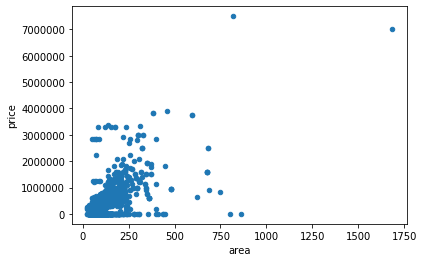

In [0]:
df.plot.scatter(x='area',y='price')